In [1]:
# 1
# 1.1 Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
#1.2 Import the dataset
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
#1.3 Check datatype
data.dtypes
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#1.4 Print statistical summary
data.describe(include='all')


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
#1.5 Determine shape
data.shape


(5000, 14)

In [6]:
#1.6 Check for NULL values
data.isnull().values.any()

False

In [7]:

drop_features = {"ID"}

data = data.drop(columns=drop_features)

data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
# 2.EDA
#2.1 Count unique values in each column
data.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [57]:
#2.2 Count # of people with zero mortgages
my_value_count = data['Mortgage'].value_counts()
my_value_count.loc[0]





3462

In [10]:
#2.3 Count # of people with zero credit card spending per month?

In [55]:
my_value_count1 = data['CCAvg'].value_counts()
my_value_count1.loc[0]

105

In [12]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [58]:
my_value_count2 = data['Income'].value_counts()
my_value_count1.loc[0]

105

In [13]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [14]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [15]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [16]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [17]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

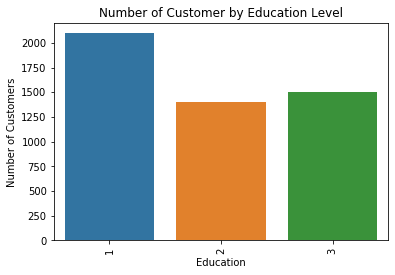

In [18]:
#2.4 Univariate and Bivariate Analysis
sns.countplot(data=data,x='Education')
plt.title('Number of Customer by Education Level')
plt.ylabel('Number of Customers')
plt.xlabel('Education')
plt.xticks(rotation = 90)
plt.show();

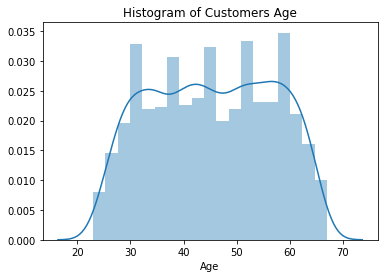

In [19]:
sns.distplot(data.Age, kde=True)
plt.title('Histogram of Customers Age')
plt.show();

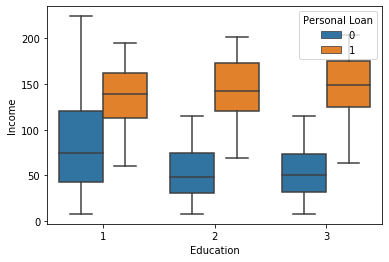

In [20]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data) #Higher income results in conversion

In [21]:
data.Age.describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [22]:
categorical_features = {"Education", "Family"}

for feature in categorical_features:

    data[feature] = data[feature].astype("category")

    

data.dtypes

Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

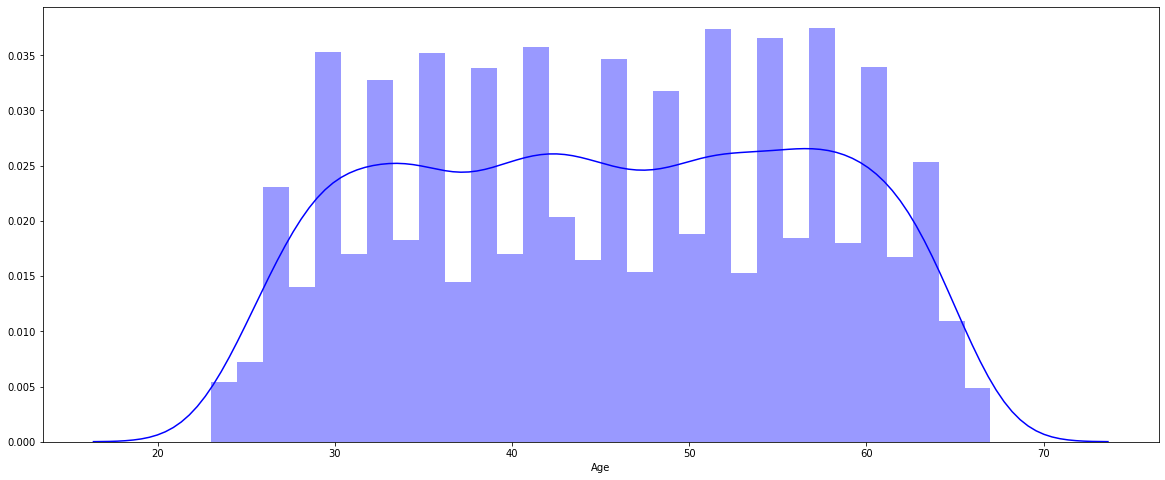

In [23]:
plt.figure(figsize=(20, 8))

sns.distplot(data['Age'], color='b', bins=30, hist_kws={'alpha': 0.4});

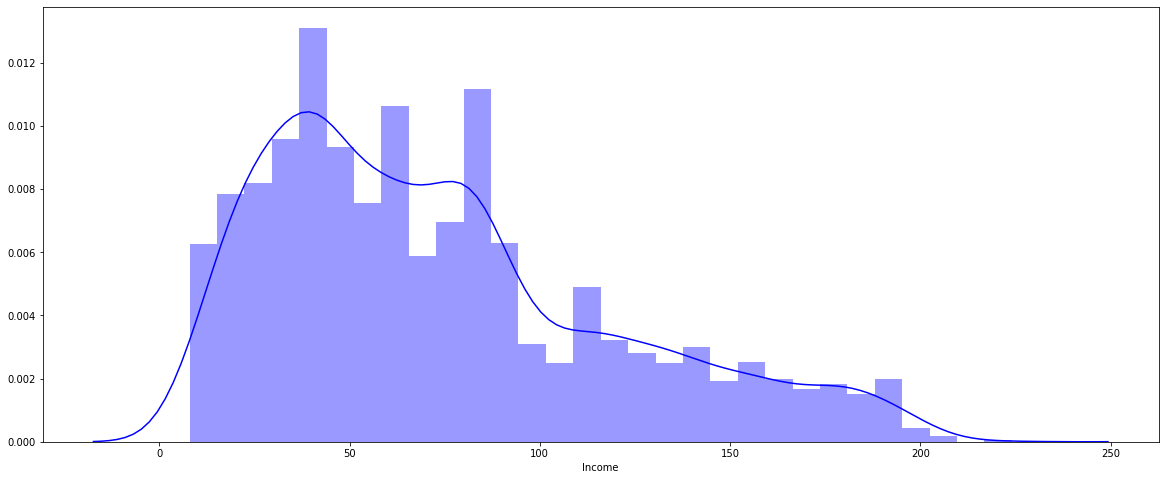

In [24]:
plt.figure(figsize=(20, 8))

sns.distplot(data['Income'], color='b', bins=30, hist_kws={'alpha': 0.4});

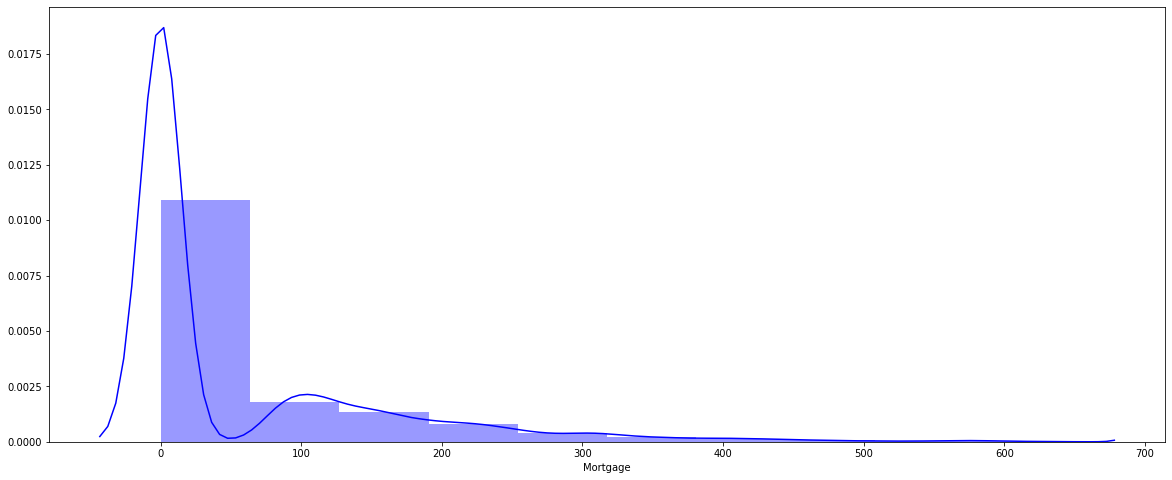

In [25]:
plt.figure(figsize=(20, 8))

sns.distplot(data['Mortgage'], color='b', bins=10, hist_kws={'alpha': 0.4});

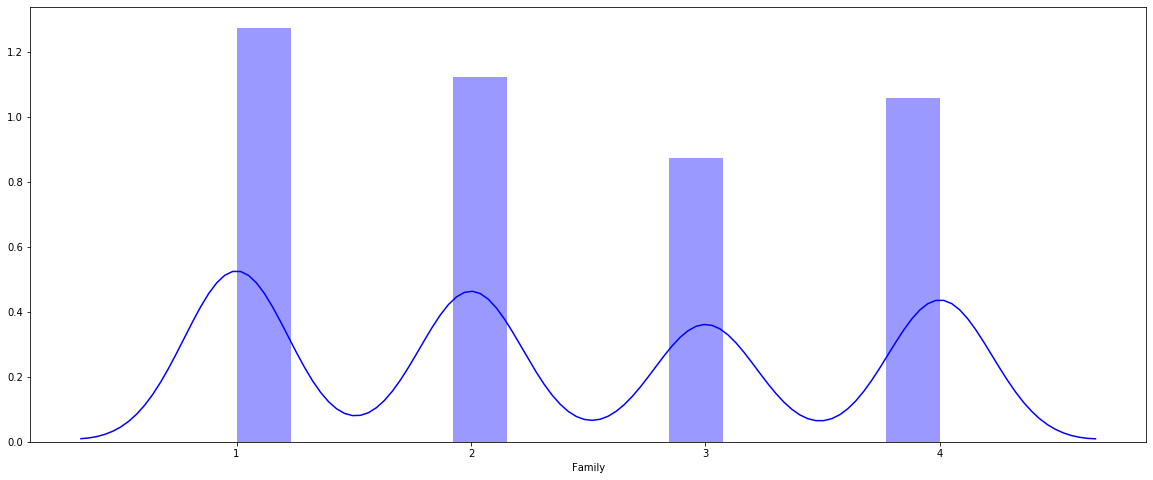

In [26]:
plt.figure(figsize=(20, 8))

sns.distplot(data['Family'], color='b');

In [27]:
data.median()

Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

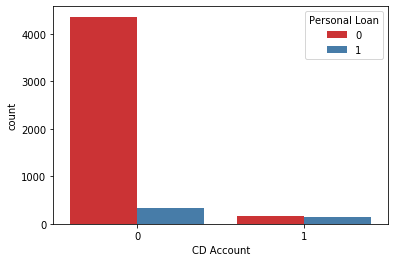

In [28]:
sns.countplot(x="CD Account",data=data,hue="Personal Loan", palette='Set1')

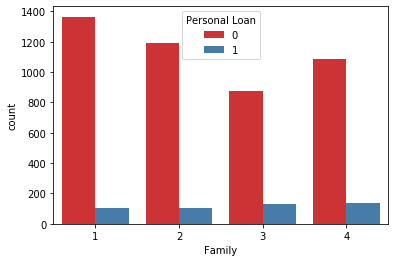

In [29]:
sns.countplot(x="Family",data=data,hue="Personal Loan", palette='Set1')

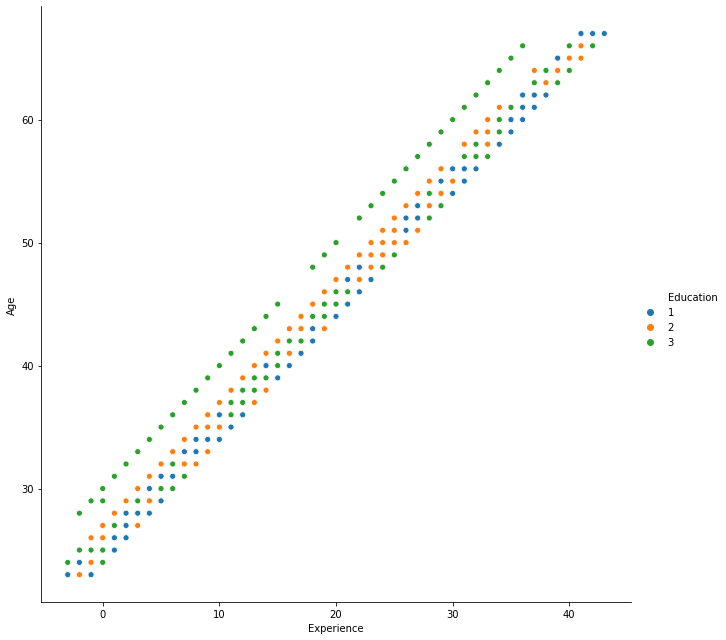

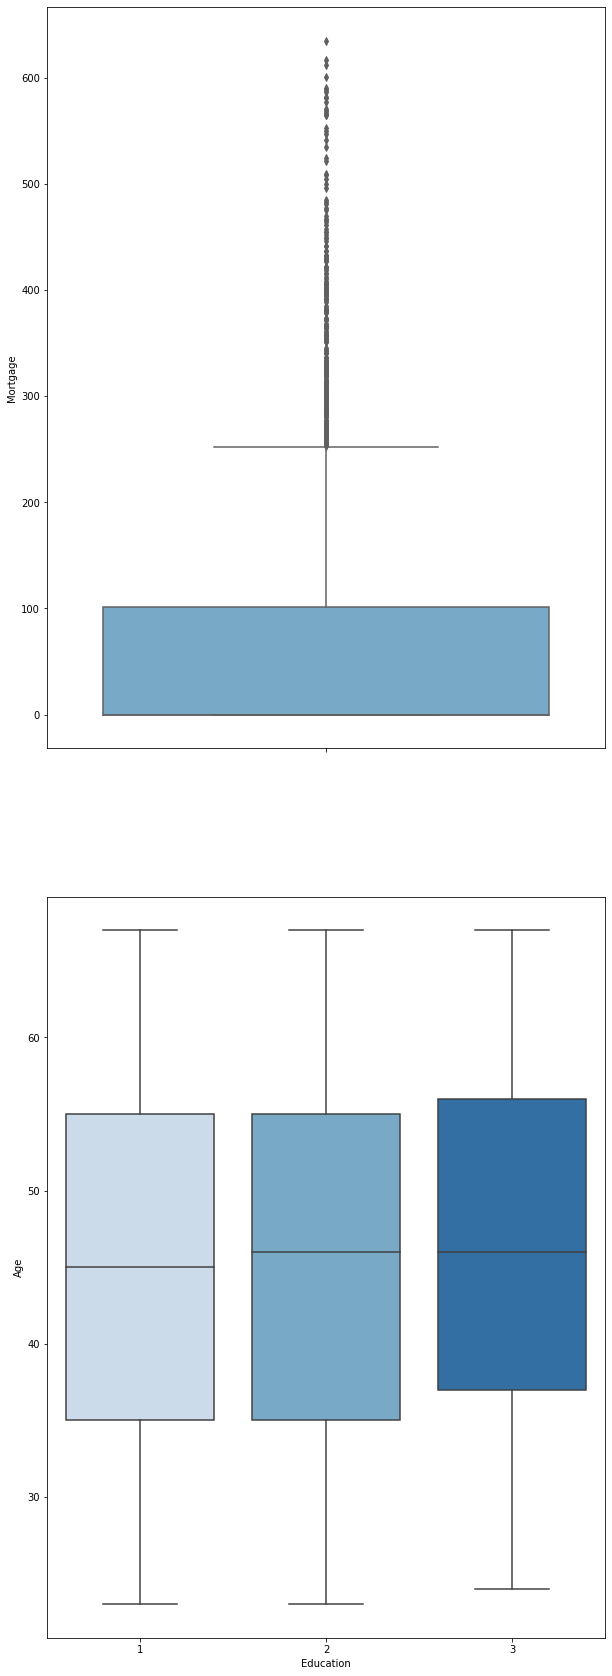

In [31]:
fig, axes = plt.subplots(nrows=2,ncols=1)

fig.set_size_inches(10, 30)
sns.boxplot(data=data,y="Mortgage",orient="v",ax=axes[0], palette="Blues")
sns.boxplot(data=data,y="Age",x="Education",orient="v",ax=axes[1], palette="Blues")

In [32]:
# Dropping outliers for Mortgage:
from scipy import stats
data['Mortgage_Z']=np.abs(stats.zscore(data['Mortgage']))
data=data[data['Mortgage_Z']<4]
data.drop('Mortgage_Z',axis=1,inplace=True)
data.shape

C:\Users\Dasha Jordan\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(4964, 13)

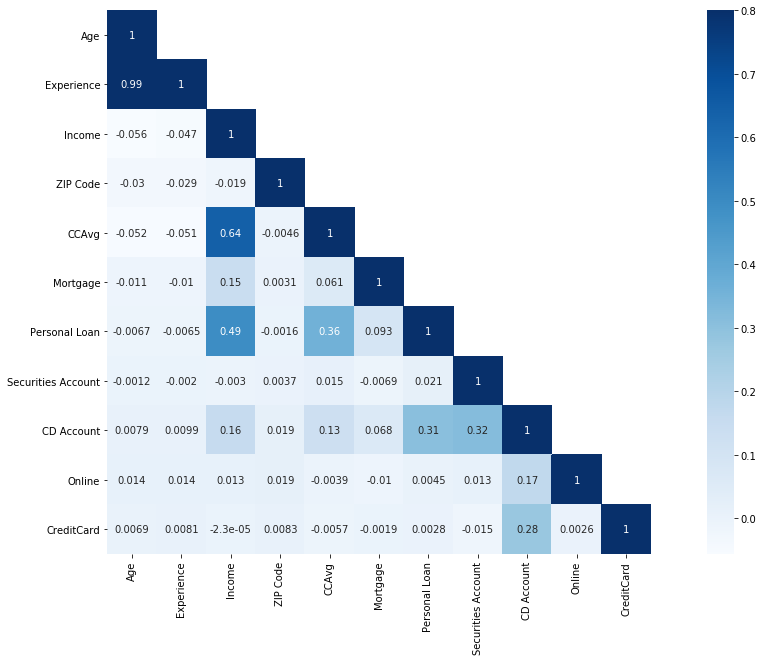

In [33]:
corrMatt = data.corr()

mask = np.array(corrMatt)

mask[np.tril_indices_from(mask)] = False

fig,ax= plt.subplots()

fig.set_size_inches(20,10)

sns.heatmap(corrMatt, cmap="Blues", mask=mask,vmax=.8, square=True,annot=True)

In [34]:
data.drop('Experience',axis=1)
data.drop('ZIP Code',axis=1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


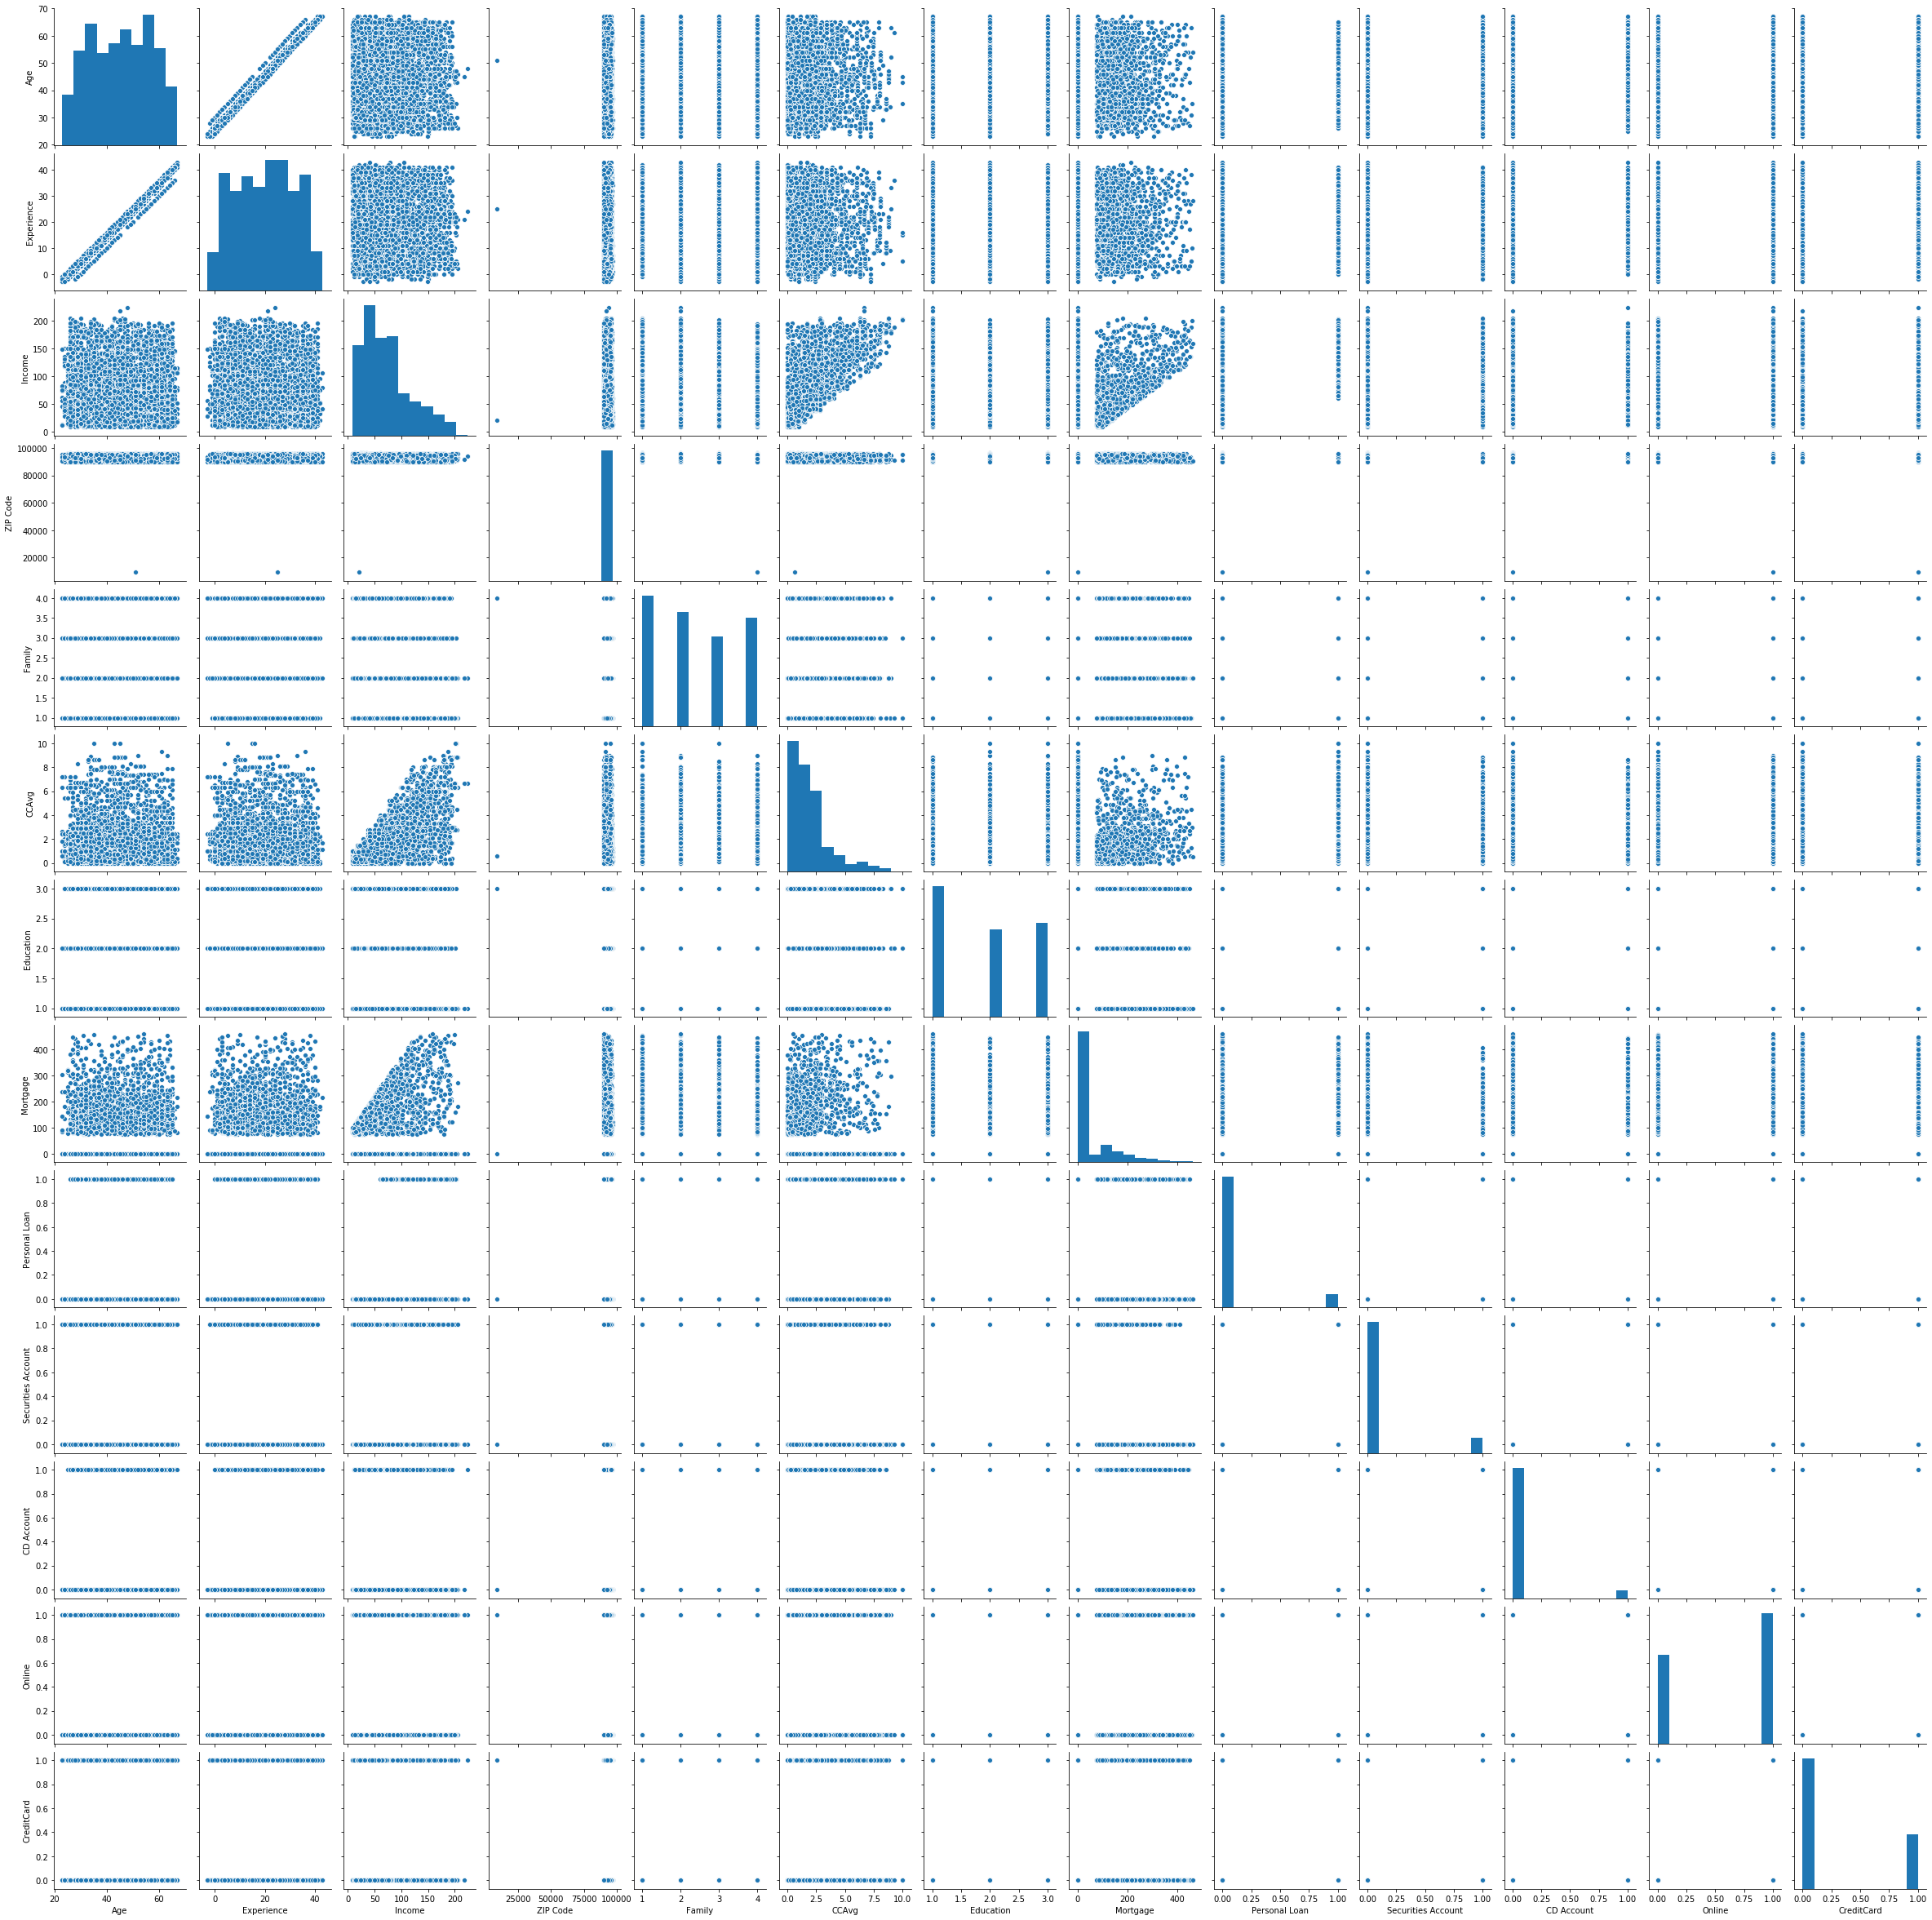

In [35]:
sns.pairplot(data)

In [36]:
data.corr()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994209,-0.055669,-0.029696,-0.052299,-0.011076,-0.006729,-0.001217,0.007882,0.013786,0.006931
Experience,0.994209,1.000000,-0.047293,-0.029004,-0.050928,-0.010140,-0.006512,-0.002049,0.009912,0.013899,0.008075
Income,-0.055669,-0.047293,1.000000,-0.018834,0.642271,0.145193,0.493571,-0.002973,0.161111,0.012929,-0.000023
ZIP Code,-0.029696,-0.029004,-0.018834,1.000000,-0.004609,0.003051,-0.001641,0.003664,0.018516,0.019254,0.008343
CCAvg,-0.052299,-0.050928,0.642271,-0.004609,1.000000,0.060628,0.359180,0.014887,0.130308,-0.003859,-0.005694
Mortgage,-0.011076,-0.010140,0.145193,0.003051,0.060628,1.000000,0.093493,-0.006897,0.067976,-0.010114,-0.001911
Personal Loan,-0.006729,-0.006512,0.493571,-0.001641,0.359180,0.093493,1.000000,0.020706,0.306610,0.004549,0.002769
Securities Account,-0.001217,-0.002049,-0.002973,0.003664,0.014887,-0.006897,0.020706,1.000000,0.317141,0.013453,-0.015268
CD Account,0.007882,0.009912,0.161111,0.018516,0.130308,0.067976,0.306610,0.317141,1.000000,0.174630,0.276986
Online,0.013786,0.013899,0.012929,0.019254,-0.003859,-0.010114,0.004549,0.013453,0.174630,1.000000,0.002635


In [37]:
def plot_corr(data, size=11):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


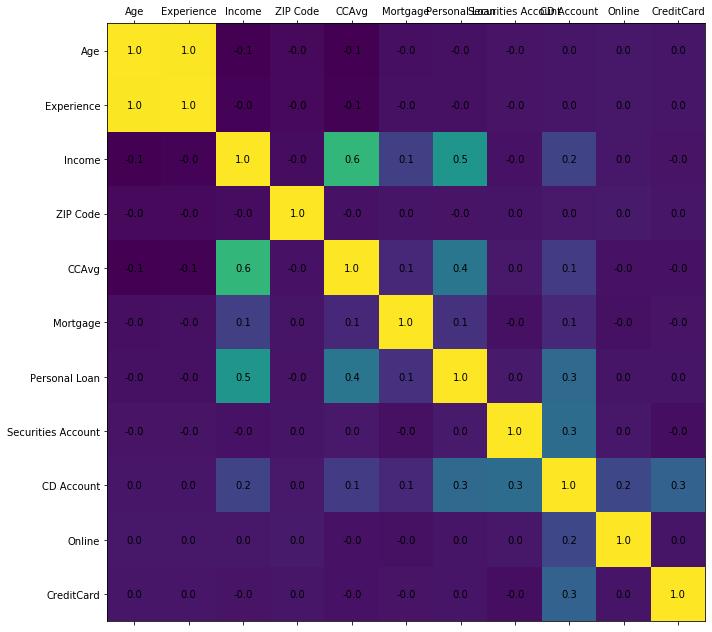

In [38]:
plot_corr(data)

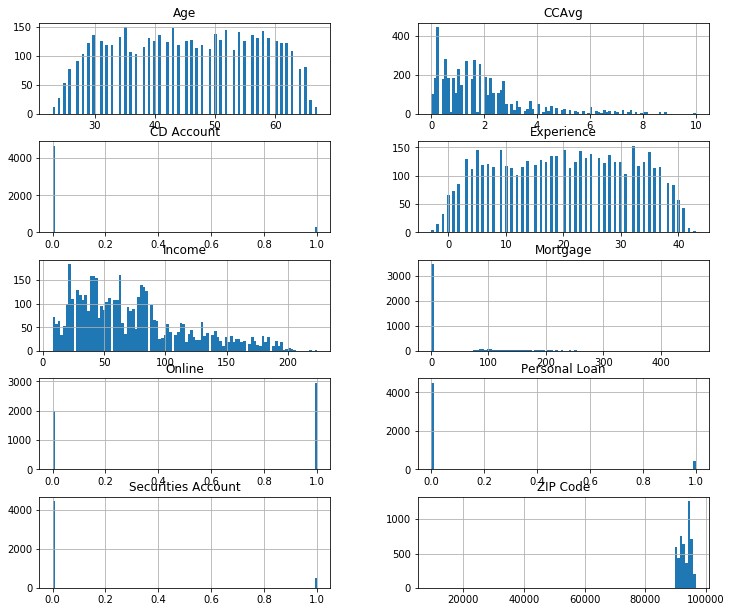

In [39]:
columns = list(data)[0:-1] # Excluding Outcome column which has only 
data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [59]:
data['Experience'].min()

-3

In [40]:
n_true = len(data.loc[data['Personal Loan'] == True])
n_false = len(data.loc[data['Personal Loan'] == False])
print("Successful Conversion: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("No conversion: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Successful Conversion: 459 (9.25%)
No conversion: 4505 (90.75%)


In [41]:
#3. Split the data intotrainingandtestsetintheratioof70:30 respectively 
from sklearn.model_selection import train_test_split


x=pd.DataFrame(columns=['Age','Income','Family','CCAvg','Education','Mortgage','CD Account','Online'],
               data=data)

y=data.iloc[:,9]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [42]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

69.98% data is in training set
30.02% data is in test set


In [43]:
print("Original Personal Loan Conversion True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original Personal Loan Conversion False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("")
print("Training Personal Loan Conversion True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan Conversion False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan Conversion True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan Conversion False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan Conversion True Values    : 459 (9.25%)
Original Personal Loan Conversion False Values   : 4505 (90.75%)

Training Personal Loan Conversion True Values    : 355 (10.22%)
Training Personal Loan Conversion False Values   : 3119 (89.78%)

Test Personal Loan Conversion True Values        : 163 (10.94%)
Test Personal Loan Conversion False Values       : 1327 (89.06%)



In [46]:
#4 Use Logistic Regression model to predict conversion/nonconversion

from sklearn.linear_model import LogisticRegression
logit =LogisticRegression()
logit.fit(x_train,y_train)
y_pred_logit=logit.predict(x_test)

C:\Users\Dasha Jordan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
from sklearn import metrics
cnf_matrix_logit = metrics.confusion_matrix(y_test, y_pred_logit)
cnf_matrix_logit

array([[1314,   13],
       [ 142,   21]], dtype=int64)

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision:",metrics.precision_score(y_test, y_pred_logit))
print("Recall:",metrics.recall_score(y_test, y_pred_logit))

Accuracy: 0.8959731543624161
Precision: 0.6176470588235294
Recall: 0.12883435582822086


#5
#True Positives (TP): we correctly predicted that personal loan conversion will occur in 1314 cases
#True Negatives (TN): we correctly predicted that personal loan conversion will not occur in 21cases
#False Positives (FP): we incorrectly predicted that there will be a conversion but there was not in 13 cases
#False Negatives (FN): we incorrectly predicted that there won't be a conversion but there was in 142 cases

Decreasing False Negatives would help Thera Bank to pursue more opportunities.

#6 Business insight

Model has a high accuracy of 90%
The model would perform better if we had more data on Mortgage, Income and CCAvg not equal 0
Also for some reason Experinice had negative numbers
(min equals -3), so there are some data quality issues.
We should concentrate in decreasing False Negatives, so Thera Bank would not miss on opportunities.
